In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from data_process import data_process

from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.stattools import acf

def data_pltshow(pre_close, peaks=None, valleys=None):
    plt.plot(pre_close)
    if(peaks is not None):
        peaks_value = []
        for point in peaks:
            plt.scatter(point, pre_close[point], color='r')
            peaks_value.append(pre_close[point])
        plt.plot(peaks,peaks_value, color='r')
    if(valleys is not None):
        valleys_value = []
        for point in valleys:
            plt.scatter(point, pre_close[point], color='y')
            valleys_value.append(pre_close[point])
        plt.plot(valleys,valleys_value, color='y')

    plt.show()
    
    
def split_time_series_by_slope(time_series, threshold):
    # 计算斜率
    slopes = np.diff(time_series)
    # 初始化分割点列表，第一个点默认为分割点
    split_points = [0]
    for i in range(1, len(slopes)):
        # 计算相邻斜率的差值
        slope_diff = abs(slopes[i] - slopes[i - 1])/slopes[i]
        if slope_diff > threshold:
            # 如果斜率差值超过阈值，将该点作为分割点
            split_points.append(i)
    # 最后一个点也作为分割点
    split_points.append(len(time_series))

    # 根据分割点分割时间序列并记录下标信息
    subsequences = []
    for i in range(len(split_points) - 1):
        start = split_points[i]
        end = split_points[i + 1]
        subsequence = time_series[start:end]
        # 记录子序列及其在原时间序列中的起始和结束下标
        subsequences.append((subsequence, start, end))

    return subsequences

In [2]:
# data_hd = data_process(["002508.SZ", '600048.SH', '600219.SH','600170.SH','600219.SH', '600369.SH', '600372.SH'],
#                          "2016-01-01", "2024-12-31", data_savedir="./tmp_test/")
# tradedata = data_hd.data_load(filetime="2016-01-01_2024-12-31", restore="pre")

# data_hd = data_process(["002508.SZ",'600048.SH' ],
#                          "2020-01-01", "2025-2-18", codefile="HS300.txt", data_savedir="./tmp_test/")
# tradedata = data_hd.data_load(filetime="2020-01-01_2025-2-18", restore="pre")

data_hd = data_process(["002508.SZ",'600048.SH' ],
                         "2020-01-01", "2025-2-18", data_savedir="./tmp_test/")
tradedata = data_hd.data_load(filetime="2020-01-01_2025-2-18", restore="pre")

# print(tradedata["002508.SZ"]["close_restore"].describe())
# close_res = tradedata["002508.SZ"]["close_restore"]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]


In [3]:
def data_pltshow(pre_close, peaks=None, valleys=None):
    plt.plot(pre_close)
    if(peaks is not None):
        peaks_value = []
        for point in peaks:
            plt.scatter(point, pre_close[point], color='r')
            peaks_value.append(pre_close[point])
        plt.plot(peaks,peaks_value, color='r')
    if(valleys is not None):
        valleys_value = []
        for point in valleys:
            plt.scatter(point, pre_close[point], color='y')
            valleys_value.append(pre_close[point])
        plt.plot(valleys,valleys_value, color='y')

    plt.show()


002508.SZ
[ 94 113 136 102 154 143 169 107]
[126 122 148  93 132 141 154  64  97]
127.25
119.66666666666667
25.346350822159785
27.804875671563632


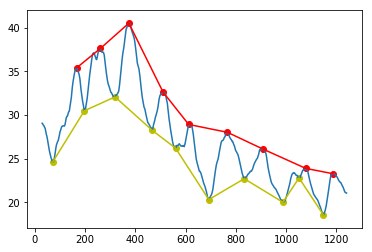

600048.SH
[130 123 263 111 220 123  64  98]
[133  67 114 207 107 158 190  95]
141.5
133.875
61.8162599968649
44.97342965574229


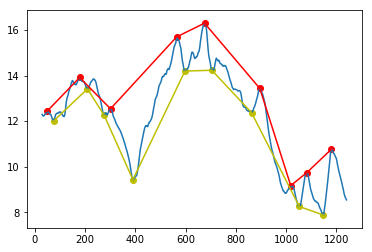

In [3]:
distance_set = 60
# print(tradedata.keys())
count = 0
for key in tradedata.keys():
    count+=1
#     if(count < 50): continue
#     if(count > 100): break
    df = tradedata[key]
    pre_close_np = df['ma30_restore'].values
    peaks, _ = find_peaks(pre_close_np, distance=distance_set, prominence=0.1)
    valleys, _ = find_peaks(-pre_close_np, distance=distance_set, prominence=0.1)
    # peaks = peaks+1
    # valleys = valleys+1
    #df['valleys'], _ = find_peaks(-df['pre_close'].tolist(), prominence=1)
    
    if(True or np.diff(peaks).std()<30 and np.diff(valleys).std()<30):
        print(key)
        print(np.diff(peaks))
        print(np.diff(valleys))
        
        print(np.diff(peaks).mean())
        print(np.diff(valleys).mean())

        print(np.diff(peaks).std())
        print(np.diff(valleys).std())
        
        data_pltshow(pre_close_np, peaks, valleys )

0.009000000000000341 -0.06540000000000035 -0.0005886000000000255
-0.028999999999999915 0.009000000000000341 -0.0002610000000000091
0.03059999999999974 -0.012199999999999989 -0.0003733199999999965
-0.0006000000000021544 0.03059999999999974 -1.8360000000065767e-05
0.006600000000002382 -0.017600000000001614 -0.00011616000000005257
-0.022000000000002018 0.01740000000000208 -0.00038280000000008086
0.015399999999999636 -0.025800000000000267 -0.00039731999999999474
-0.02379999999999427 0.04819999999999425 -0.0011471599999995869
0.0073999999999969646 -0.027000000000001023 -0.0001997999999999256
-0.035000000000003695 0.023800000000001376 -0.000833000000000136
0.02300000000000324 -0.035600000000002296 -0.0008188000000001681
-0.016399999999997306 0.0049999999999954525 -8.199999999991195e-05
0.006799999999998363 -0.023400000000002308 -0.00015911999999997738
-0.015399999999999636 0.006799999999998363 -0.00010471999999997231
0.0040000000000048885 -0.00560000000000116 -2.2400000000032013e-05
-0.04600

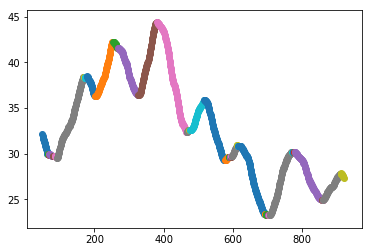

In [76]:
def split_time_series_by_slope(time_series, threshold):
    # 计算斜率
    slopes = np.diff(time_series)
    # 初始化分割点列表，第一个点默认为分割点
    split_points = [0]
    for i in range(1, len(slopes)):
        # 计算相邻斜率的差值
        slope_diff = abs(slopes[i] - slopes[i - 1])/slopes[i]
#         print(slopes[i])
        
        if slopes[i] * slopes[i - 1]<0 :
            print(slopes[i] , slopes[i - 1], slopes[i] * slopes[i - 1])
            # 如果斜率差值超过阈值，将该点作为分割点
            split_points.append(i)
    # 最后一个点也作为分割点
    split_points.append(len(time_series))

    # 根据分割点分割时间序列并记录下标信息
    subsequences = []
    for i in range(len(split_points) - 1):
        start = split_points[i]
        end = split_points[i + 1]
        subsequence = time_series[start:end]
        # 记录子序列及其在原时间序列中的起始和结束下标
        subsequences.append((subsequence, start, end))

    return subsequences

df = tradedata["002508.SZ"]
pre_close_np = df['ma50'].values
threshold = 0
# 调用函数进行分割
subsequences = split_time_series_by_slope(pre_close_np[0:920], threshold)

print("分割后的子序列及其下标信息：")
for subseq, start, end in subsequences:
    print(f"子序列: {len(subseq)}, 起始下标: {start}, 结束下标: {end}")
    x = range(start, end)
    plt.scatter(x ,subseq)
plt.show()

[  25  162  260  374  500  612  688  768  904  979 1066 1177]
[  63  195  299  455  544  686  829  987 1145]
[137  98 114 126 112  76  80 136  75  87 111]
[132 104 156  89 142 143 158 158]
22.012768646198833
24.23195204683271


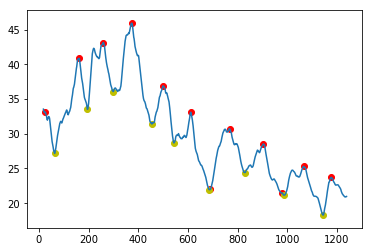

In [12]:
distance_set = 75
df = tradedata["002508.SZ"][1:]
pre_close_np = df['ma20'].values
peaks, _ = find_peaks(pre_close_np, distance=distance_set)
valleys, _ = find_peaks(-pre_close_np, distance=distance_set, prominence=1)
# peaks = peaks+1
# valleys = valleys+1
#df['valleys'], _ = find_peaks(-df['pre_close'].tolist(), prominence=1)

print(peaks)
print(valleys)

print(np.diff(peaks))
print(np.diff(valleys))

print(np.diff(peaks).std())
print(np.diff(valleys).std())

data_pltshow(pre_close_np, peaks, valleys )

[139  96 118 125 112 134 156 166 108]
[143 124 213 152 142 160 152  94]
21.534353834320832
31.52776554086889


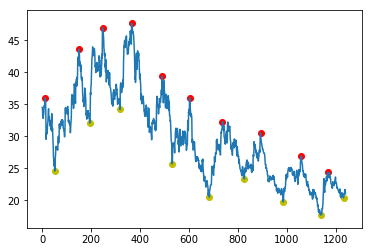

In [7]:
distance_set = 90
df = tradedata["002508.SZ"][1:]
pre_close_np = df['pre_close'].values
peaks, _ = find_peaks(pre_close_np, distance=distance_set)
valleys, _ = find_peaks(-pre_close_np, distance=distance_set, prominence=1)
# peaks = peaks+1
# valleys = valleys+1
#df['valleys'], _ = find_peaks(-df['pre_close'].tolist(), prominence=1)

print(np.diff(peaks))
print(np.diff(valleys))

print(np.diff(peaks).std())
print(np.diff(valleys).std())

data_pltshow(pre_close_np, peaks, valleys )

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [16]:
# 单位根检验
from statsmodels.tsa.stattools import adfuller

result = adfuller(pre_close[1:])
print('-------------------------------------------')
print('ADF检验结果：')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %d' % result[2])
print('Observations Used: %d' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

-------------------------------------------
ADF检验结果：
ADF Statistic: -2.512992
p-value: 0.112345
Lags Used: 0
Observations Used: 2185
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [17]:
##### 差分运算
def diff(timeseries):
    new_df=timeseries.diff(periods=1).dropna()#dropna删除NaN
    new_df.plot(color='orange',title='diff1')
    return new_df

#进行一阶差分
ndf=diff(pre_close[1:])

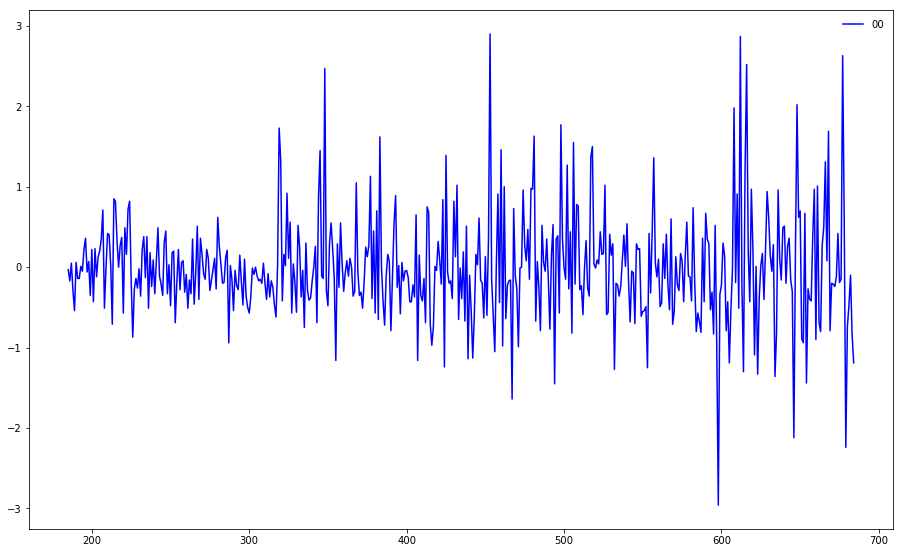

In [23]:
data_pltshow(ndf[1500:2000])

In [21]:
result = adfuller(ndf)
print('-------------------------------------------')
print('ADF检验结果：')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %d' % result[2])
print('Observations Used: %d' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

-------------------------------------------
ADF检验结果：
ADF Statistic: -47.564072
p-value: 0.000000
Lags Used: 0
Observations Used: 2184
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


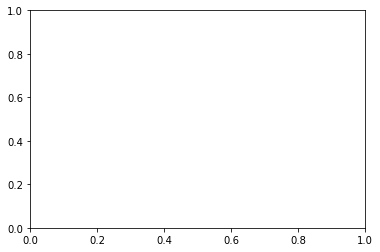

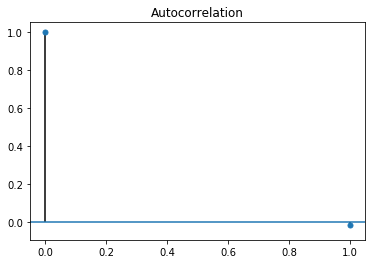

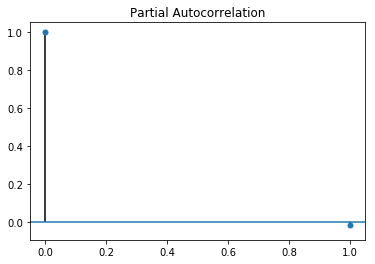

In [28]:
#模型选择：绘制ACF与PACF,即自相关图和偏自相关图
#### 绘制ACF与PACF的图像
def plot_acf_pacf(timeseries): #利用ACF和PACF判断模型阶数
    plot_acf(timeseries,lags=timeseries.shape[0]%2) #延迟数
    plot_pacf(timeseries,lags=timeseries.shape[0]%2)
    plt.show()
plot_acf_pacf(ndf)

In [31]:
#模型构建
print('-------------------------------------------')
model= ARIMA(ndf, order=(1, 1, 2)).fit()
print(model)
print(model.params)
print(model.summary())

-------------------------------------------


ValueError: Given a pandas object and the index does not contain dates